# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Категоризация" data-toc-modified-id="Категоризация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Категоризация</a></span><ul class="toc-item"><li><span><a href="#Категории-целей-кредита" data-toc-modified-id="Категории-целей-кредита-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Категории целей кредита</a></span></li><li><span><a href="#Категории-уровней-дохода" data-toc-modified-id="Категории-уровней-дохода-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Категории уровней дохода</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-зависимостей" data-toc-modified-id="Исследование-зависимостей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование зависимостей</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Есть ли зависимость между наличием детей и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Есть ли зависимость между семейным положением и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [1]:
from IPython.display import display
import pandas as pd
from pymystem3 import Mystem
import seaborn as sns
from matplotlib import pyplot as plt

## Изучение общей информации

In [2]:
df = pd.read_csv('../datasets/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Выведем на экран часть таблицы, чтобы ознакомиться с данными

In [3]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Посмотрим как обстоят дела с числовыми столбцами. Сгенерируем описатльную статистику командой `.describe()`

In [4]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Вывод**

1. Более чем в 2 тысячах случаев пропущены значения `days_employed` и `total_income`, причем количество пропусков одинаково. Скорее всего начиличие пропусков в этих столбцах взаимосвязано.
2. Из описательной статистики видим, что в поле возраста `dob_years` есть значения равные 0. Очевидно, это пропуски.
3. Оттуда же замечаем, что есть клиенты, у которых указано отрицатальное количество детей `children` равное -1 и 20. Проанализируем позже
4. Помимо наличия пропусков, видна ещё одна проблема в столбце `days_employed`: часть значений положительные, часть отрицательные. Причём значения с `+` и `-` отличаются более, чем на порядок, это, очевидно, не опечатка
5. Видим, что в столбце `education` используются разные регистры, надо привести к единому

## Предобработка данных

### Обработка пропусков

Сначала удалим явные дубликаты. Их удаляем с помощью метода `.drop_duplicates()`, поскольку он удаляет полностью дублирующиеся строки оставляет только одну из всех повторяющихся. Но сначала приведём поле образование к единому регистру

Наличие таких дубликатов может быть обусловлено технической ошибкой во время экспорта данных или повторным их внесением оператором.

<a id='fighting_the_register'> </a>

При открытии таблицы в глаза бросились одинаковые по смыслу значения поля `education`, написанные в разном регистре.
Посмотрим, какие значения встречаются в таблице, и соотвествует ли среднее по этим значениям их `id`. Сделаем аналогичную проверку для поля `family_status`

In [5]:
print(df.groupby('education')['education_id'].mean())
print(df.groupby('family_status')['family_status_id'].mean())

education
ВЫСШЕЕ                 0
Высшее                 0
НАЧАЛЬНОЕ              3
НЕОКОНЧЕННОЕ ВЫСШЕЕ    2
Начальное              3
Неоконченное высшее    2
СРЕДНЕЕ                1
Среднее                1
УЧЕНАЯ СТЕПЕНЬ         4
Ученая степень         4
высшее                 0
начальное              3
неоконченное высшее    2
среднее                1
ученая степень         4
Name: education_id, dtype: int64
family_status
Не женат / не замужем    4
в разводе                3
вдовец / вдова           2
гражданский брак         1
женат / замужем          0
Name: family_status_id, dtype: int64


id полей нигде не перепутаны. В `education` , только использован разный регистр, что привело к появлению дубликатов, приведём к нижнему регистру. В поле `family_status` нет неявных дубликатов, но тоже приведём для однообразия.

In [6]:
df['education'] = df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()

print(df['education'].unique())
print(df['family_status'].unique())

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'не женат / не замужем']


In [7]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21454 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Проверим, что пропуски в столбцах `days_employed` и `total_income` находятся в одних и тех же строках

In [8]:
if df[df['days_employed'].isna()].equals(df[df['total_income'].isna()]):
    print('Пропуски в данных о трудовом стаже и доходах в одних и тех же строках')
else: print('Строки с пропусками в данных о трудовом стаже и доходах разные')

Пропуски в данных о трудовом стаже и доходах в одних и тех же строках


Предположение подтвердилось. 

Наличие пропусков (NaN) в этих столбцах может быть связано с ошибкой в процессе выгрузки данных.

Внимательнее изучим значения в столбцах `days_employed` и `total_income`, чтобы определить, как заполнить пропуски.
Сгруппируем данные в таблице по типу занятости и рассчитаем для каждого типа минимальное, максимальное, среднее, медианное значения трудового стажа и доходов. Средние и медианные значения могут пригодиться для заполнения пропусков в этих столбцах. Также полезно посмотреть на количество записей по каждому типу занятости. 

Сделаем то же самое для возраста `dob_years` и количества детей `children`

In [9]:
display(df.groupby('income_type')[['days_employed','total_income']].agg(['min', 'max', 'mean', 'median', 'count']))
df.groupby('income_type')[['dob_years','children']].agg(['min', 'max', 'mean', 'median', 'count'])

days_employed                                               \
                           min            max           mean         median   
income_type                                                                   
безработный      337524.466835  395302.838654  366413.652744  366413.652744   
в декрете         -3296.759962   -3296.759962   -3296.759962   -3296.759962   
госслужащий      -15193.032201     -39.954170   -3399.896902   -2689.368353   
компаньон        -17615.563266     -30.195337   -2111.524398   -1547.382223   
пенсионер        328728.720605  401755.400475  365003.491245  365213.306266   
предприниматель    -520.848083    -520.848083    -520.848083    -520.848083   
сотрудник        -18388.949901     -24.141633   -2326.499216   -1574.202821   
студент            -578.751554    -578.751554    -578.751554    -578.751554   

                         total_income                               \
                 count            min           max           mean   
income_type                                                          
безработный          2   59956.991984  2.027225e+05  131339.751676   
в декрете            1   53829.130729  5.382913e+04   53829.130729   
госслужащий       1312   29200.077193  9.104515e+05  170898.309923   
компаньон         4577   28702.812889  2.265604e+06  202417.461462   
пенсионер         3443   20667.263793  7.351033e+05  137127.465690   
предприниматель      1  499163.144947  4.991631e+05  499163.144947   
сотрудник        10014   21367.648356  1.726276e+06  161380.260488   
студент              1   98201.625314  9.820163e+04   98201.625314   

                                       
                        median  count  
income_type                            
безработный      131339.751676      2  
в декрете         53829.130729      1  
госслужащий      150447.935283   1312  
компаньон        172357.950966   4577  
пенсионер        118514.486412   3443  
предприниматель  499163.144947      1  
сотрудник        142594.396847  10014  
студент           98201.625314      1

dob_years                              children                \
                      min max       mean median  count      min max      mean   
income_type                                                                     
безработный            31  45  38.000000   38.0      2        0   1  0.500000   
в декрете              39  39  39.000000   39.0      1        2   2  2.000000   
госслужащий             0  75  40.647220   40.0   1457       -1  20  0.621139   
компаньон               0  74  39.693383   39.0   5078       -1  20  0.599055   
пенсионер               0  74  59.048577   60.0   3829       -1  20  0.132933   
предприниматель        27  58  42.500000   42.5      2        0   0  0.000000   
сотрудник               0  74  39.808372   39.0  11084       -1  20  0.642818   
студент                22  22  22.000000   22.0      1        0   0  0.000000   

                               
                median  count  
income_type                    
безработный        0.5      2  
в декрете          2.0      1  
госслужащий        0.0   1457  
компаньон          0.0   5078  
пенсионер          0.0   3829  
предприниматель    0.0      2  
сотрудник          0.0  11084  
студент            0.0      1

Из 8 категорий занятости наиболее многочисленная - `сотрудник`. Также в большом количестве представлены `компаньон`, `пенсионер` и `госслужащий`. Остальные представлены только в количесве не более 2. 
Заметим:
1. Средние и медианные значения для всей таблицы и для отдельных типов занятости отличаются. Кроме этого, медианные значения для доходов отличаются в некоторых типах на десятки тысяч в меньшую сторону. Для заполенния пропусков по доходам разумнее взять медианное значение по соответсвующему типу. В первой сводной таблице количество значений стажа и доходов для типа занятости `предприниматель` = 1, во второй количество значений возраста и детей = 2, значит, у одного из предпринимателей отсутсвует информация о стаже и доходах. Вообще говоря в таком случае не совсем верно заполнять неизвестный доход на основе медианного, так как мы просто скопируем значение для второго предпринимателя, а у разных предпринимателей доходы могут отличаться на несколько порядков. Лучше обратиться к разработчикам для уточнения. Однако наша выборка по предпринимателям итак невелика.
2. Очень большие положительные значения трудового стажа видим только в двух категорях - `пенсионер` и `безработный`. Наличие таких выбросов может быть связвно с тем, что алгоритм, по которому определялся трудовой стаж при выгрузке данных, некорректно сработал на нетрудоустроенных клиентах. Лучше всего уточнить у разработчиков, есть ли у них правильные значения, и вообще что конкретно понимается под трудовым стажем: учитывается только последнее место работы или все. Поскольку не стоит задачи проанализировать влияние трудового стажа на возврат кредита в срок, заменим эти значения нулями, чтобы они не мешали при подсчёте медианных значений (будем считать, что при таком типе занятости трудовой стаж не идёт). У остальных значений заменим знак на `+`
3. В поле возраста `dob_years` присутсвует значение 0. Это пропуск, возможно связан с тем, что клиент его не указал.
4. Количество детей `children` как видно из таблицы у некоторых клиентов равно -1, у некоторых 20. Скорее всего в обоих случаях опечатка.   

Для заполнения пропусков применим метод `fillna()` к каждому из столбцов по отдельности
Поскольку заполняем мы по медианному значению для определённого типа занятости, то в fillna мы передадим результат действия методов `groupby().transform()`
`groupby()` группирует по нужному столбцу значения из указанного столбца, применённый к нему `.transform('median')` применяет функцию median() к группе и возвращает индексированный объект с индексацией соответсвующей исходному объекту. `fillna()` возьмёт из него только те обекты, индексы которых соответсвуют индексам NaN

In [10]:
# заполняем пропуски
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))
df['days_employed'] = df['days_employed'].fillna(df.groupby('income_type')['days_employed'].transform('median'))
df['days_employed'] = df['days_employed'].abs()
# заменим у неработающих клиентов значение days_employed на 0
df.loc[(df['income_type']=='пенсионер') | (df['income_type']=='безработный'), ['days_employed']] = 0

Посмотрим на значения полей возраста и количества детей, поскольку до этого мы видели только максимальные и минимальные значения, возможно есть ещё черезчур многодетные клиенты. Для возраста ограничим вывод значением 21, несовершеннолетним кредит точно не дадут.

In [11]:
print(df.groupby('children')['total_income'].count())
print('Самые молодые клиенты, dob_years:', df[df['dob_years'] < 21]['dob_years'].unique())

children
-1        47
 0     14091
 1      4808
 2      2052
 3       330
 4        41
 5         9
 20       76
Name: total_income, dtype: int64
Самые молодые клиенты, dob_years: [20  0 19]


Подтверждаем, что значения количества детей у клиентов -1 и 20 - опечатки. Заменим `-1` на `1`, `20` на `2`. Возраст `0` тоже ошибка, заменим на среднее по типу занятости.

In [12]:
# поправляем столбец children
df['children'] = df['children'].replace([-1,20],[1,2])

# для столбца dob_years заменим 0 на средние по соответсвующему типу
dob_years_mean = df[df['dob_years']!=0].groupby('income_type')['dob_years'].mean()
df.loc[df['dob_years']==0, 'dob_years'] = df['income_type'].map(dob_years_mean)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  float64
 2   dob_years         21454 non-null  float64
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


**Вывод**

В данных присутствовали пропуски, обусловленные разными причинами: опечатки, ошибки выгрузки данных, ошибки на этапе внесения данных. Пропуски обработаны.

### Замена типа данных

Нет смысла хранить данные о днях стажа, возрасте в годах и доходях в рублях в вещественном формате, разумнее использовать целочисленный. Заменим тап данных.
Кроме того, для целочисленных данных в таблице используется тип `int64`, который занимает 8 байт, поэтому в зависимости от диапазона возможных значений в столбце можно привести к `int32` или даже `int16` 

In [13]:
df[['children','days_employed','dob_years']] = df[['children','days_employed','dob_years']].astype('int')
df['total_income'] = df['total_income'].astype('int64') # вдруг int32 не хватит)
df[['education_id','family_status_id','debt']] = df[['education_id','family_status_id','debt']].astype('int16')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21454 non-null  int32 
 1   days_employed     21454 non-null  int32 
 2   dob_years         21454 non-null  int32 
 3   education         21454 non-null  object
 4   education_id      21454 non-null  int16 
 5   family_status     21454 non-null  object
 6   family_status_id  21454 non-null  int16 
 7   gender            21454 non-null  object
 8   income_type       21454 non-null  object
 9   debt              21454 non-null  int16 
 10  total_income      21454 non-null  int64 
 11  purpose           21454 non-null  object
dtypes: int16(3), int32(3), int64(1), object(5)
memory usage: 1.4+ MB


**Вывод**

Тип данных изменён. Как видим, до преобразования типов таблица занимала `2.0+ MB`, после - `1.4+ MB`, почти в полтора раза меньше. В примере с данной таблицей эта разница не столь существенна, однако при работе с более объёмными данными удобнее работать с "лёгким" датафреймом. Размер можно ещё сократить, если вместо строковых обозначений `gender` ввести числовые а также ввести таблицы справочники для колонок `family_status` и `education`.

### Обработка дубликатов

Явные дубли мы уже удалили в начале.

Кстати, сгруппируем ещё по `gender`, вдруг есть неявные дубли 

In [14]:
print(df.groupby('gender')['debt'].count())

gender
F      14174
M       7279
XNA        1
Name: debt, dtype: int64


Хм... XNA? Гендер - он и в России гендер. Это значение встречается лишь однажды, можно просто удалить эту строчку. Но отнесём его к одной из двух групп на основе значений других полей. Посмотрим на эту строчку. 

In [15]:
df[df['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10684,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


Предположим, что мужчины и женщины среди компаньонов, состоящих в гражданском браке, делятся не в равных соотношениях, поэтому отфильтруем по этим значениям, посмотрим, сколько мужчин и женщин среди клиентов с такими параметрами.

In [16]:
temp_df = df[ (df['income_type']=='компаньон') & (df['family_status']=='гражданский брак')]
temp_df.groupby(['gender'])['total_income'].count()

gender
F      663
M      347
XNA      1
Name: total_income, dtype: int64

Женщин почти в 2 раза больше, сделаем XNA женщиной!

In [17]:
df.loc[df['gender']=='XNA','gender'] = 'F'

**Вывод**

Помимо явных дублей строк в таблице присутсвовали одинаковые по смыслу значения в столбце `education`, написанные в разном регистре. Возможно наличие таких повторов связано с тем, что данные вносились разными операторами или в разных системах. Дубли удалены

### Категоризация

#### Категории целей кредита

Для выделения категорий целей кредита удобнее всего провести лемматизацию значений этого столбца. 

Посмотрим сначала, какие уникальные значения в нём содержатся

In [18]:
purposes = df['purpose'].unique()
purposes

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Уже можно выделить общие категории: `недвижимость`, `образование`, `автомобиль` и `свадьба`. В разных случаях форма слов разная, поэтому и проводим лемматизацию. Будем использовать библиотеку `pymystem3`. Поскольку процесс лемматизации проходит долго, не будем применять метод `lemmatize()` к каждому элементу столбца `purpose`, сначала применим к списку уникальных занчений и составим словарь `purposes_dict`, на основе которого потом будем присваивать категорию по значению столбца.

Затем с помощью `.map()` из pandas на основе этого словаря сразу присвоим значения в новый столбец.

In [19]:
m = Mystem()

purposes_dict = {}
for p in purposes:
    p_lemmatized = m.lemmatize(p)
    if 'недвижимость' in p_lemmatized or 'жилье' in p_lemmatized: 
        purposes_dict[p] = 'недвижимость'
    elif 'автомобиль' in p_lemmatized:  purposes_dict[p] = 'автомобиль'
    elif 'образование' in p_lemmatized: purposes_dict[p] = 'образование'
    elif 'свадьба' in p_lemmatized:     purposes_dict[p] = 'свадьба'
    else: purposes_dict[p] = 'другое'

df['purpose_category'] = df['purpose'].map(purposes_dict)
# выведем для проверки количество записей в каждой категории
df.groupby('purpose_category')['purpose'].count()

#### Категории уровней дохода

Для ответа на воопрос о зависимости между уровнем дохода и возвратом кредита в срок сначала лучше провести категоризацию этого столбца.

Для начала посмотрим на распределение доходов `total_income` по всему датафрейму. Построим гистограмму

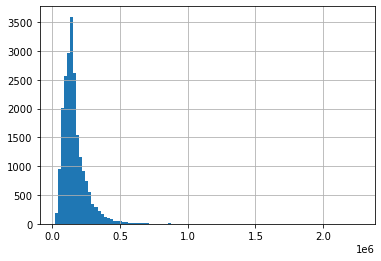

In [ ]:
df['total_income'].hist(bins=100);

Пока лишь видим, что максимум распределения сильно смещён влево, приходится примероно на значение в области 200k, посмотрим на распредление доходов с `total_income < 500k`

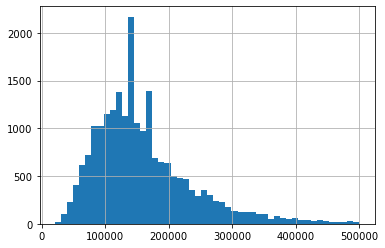

In [ ]:
df[df['total_income']<5e5]['total_income'].hist(bins=50);

На гистограмме, построенной со столбцами шириной в 50k и 5k уже получше видно, как распределяются доходы. Явно наличие выбросов, проверять мы их конечно же не будем. Также взглянем, на какие значения доходов приходятся группы, доходы которых выше 10%, 25%, 50% и 75% от выборки. Для этого применим метод `.describe()` к столбцу `total_income`.


In [ ]:
df['total_income'].describe(percentiles=[.1,.25,.5,.75,])

count    2.145400e+04
mean     1.653196e+05
std      9.818730e+04
min      2.066700e+04
10%      7.872110e+04
25%      1.076230e+05
50%      1.425940e+05
75%      1.958202e+05
max      2.265604e+06
Name: total_income, dtype: float64

Напишем функцию для выделения категорий доходов `income_category`. При этом учтём, что возможно имеет смысл делит не на равные группы, поскольку, например для клиентов с маленькими доходами интуитивно понятно, что вероятность возврата кредита в срок скорее всего окажется ниже. В функции добавим возможность через аргументы передавать список значений для разбивки на категории и список названий категорий.

Запишем категорию для каждой записи в датафрейм, для этого создадим новый столбец `income_category`, для его заполения применим функцию методом `.apply()`

In [ ]:
def set_income_level(row, 
                     split_values=[75000, 150000, 250000], 
                     categories=['низкий','средний','высокий','очень высокий']):
    """
    Возвращает категорию уровня дохода по значению total_income строки row
    - значения для разбивки передаются в split_values
    - имена категорий в categories, по умолчанию:
    - `низкий` - менее 75k, `средний` - от 75k до 150k, `высокий` - от 150k до 250k, `очень высокий` - свыше 250k
    """
    if len(split_values) != len(categories)-1:
        print('Длина списка categories должна быть на 1 больше длины списка split_values')
        return ''

    income = row['total_income']
    for i in range(len(split_values)):
        if income < split_values[i]:
            return categories[i]
    return categories[-1]

df['income_level'] = df.apply(set_income_level, axis=1)
# выведем для проверки
df.groupby('income_level')['total_income'].count()


income_level
высокий          7018
низкий           1865
очень высокий    2813
средний          9758
Name: total_income, dtype: int64

**Вывод**

- По результатам лемматизации выделяется 4 категории целей кредита: `недвижимость`, `образование`, `автомобиль` и `свадьба`
- На основе значений доходов тоже можно выделить категории с низким, высоким, средним заработком. Реализовали для этого функцию, с помощью которой при необходимости можно будет переопределить категории на этапе анализа
- Для ответа на вопрос о зависомости наличия детей и возврата кредита в срок категории 'имеет детей' и 'не имеет детей' вводить не будем, так как факт наличия легко проверятеся одним условием.
- Можно также ввести возрастные категории, однако в задании не стоит задача анализа зависимотси возраста и возврата кредита в срок 

## Исследование зависимостей

Ещё раз взглянем на данные

In [ ]:
display(df.head(10)) 
df.info()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,income_level
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,очень высокий
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,средний
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,средний
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,очень высокий
4,0,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,высокий
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,недвижимость,очень высокий
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,недвижимость,высокий
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,средний
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба,средний
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,недвижимость,средний


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21454 non-null  int32 
 1   days_employed     21454 non-null  int32 
 2   dob_years         21454 non-null  int32 
 3   education         21454 non-null  object
 4   education_id      21454 non-null  int16 
 5   family_status     21454 non-null  object
 6   family_status_id  21454 non-null  int16 
 7   gender            21454 non-null  object
 8   income_type       21454 non-null  object
 9   debt              21454 non-null  int16 
 10  total_income      21454 non-null  int64 
 11  purpose           21454 non-null  object
 12  purpose_category  21454 non-null  object
 13  income_level      21454 non-null  object
dtypes: int16(3), int32(3), int64(1), object(7)
memory usage: 1.7+ MB


Для того, чтобы оценить вероятность невозврата кредита в срок для какой-либо категории, можем взять среднее значение `debt` по этой категории, чем ближе значение среднего к нулю, тем меньше вероятность того, что клиент в такой категории буудет иметь задолженность.

#### Есть ли зависимость между наличием детей и возвратом кредита в срок?

С помощью фмльтра по столбцу `children` посмотрим средние значения вероятности задолженности для клиентов с детьми и без детей

Заодно посмотрим уникальные значения в столбца `children` немного, сгруппируем по ним и посмотрим на средние значения и на количество записей столбца `debt`. 

In [ ]:
print(f"Доля задолжников:")
print(f"        с детьми: {df[df['children']>0]['debt'].mean():.2%}")
print(f"       без детей: {df[df['children']==0]['debt'].mean():.2%}")
df.groupby('children')['debt'].agg(['mean','count'])


Доля задолжников:
        с детьми: 9.21%
       без детей: 7.54%


,mean,count
children,,
0,0.075438,14091
1,0.091658,4855
2,0.094925,2128
3,0.081818,330
4,0.097561,41
5,0.000000,9


**Вывод**

Действительно факт наличия детей влияет на вероятность возврата креддита в срок: доля задолжников у клиентов с детьми в среднем почти на 2% выше, чем у клиентов без детей.
При этом есть некоторый разброс значений в зависимости от количества детей, но в целом у любой подгруппы вероятность задолженности выше, чем у клиентов без детей. 

Может показаться, что чем больше детей, тем вероятность задолженности должна быть больше. Однако на данной выборке это не так, но не стоит забывать, что группы с 3, 4, и 5 детьми самые малочисленные, эти выборки не такие репрезентативные. Поэтому есть смысл смотреть именно на факт наличия детей.

#### Есть ли зависимость между семейным положением и возвратом кредита в срок? 

Снова сгруппируем данные, теперь по столбцу `family_status` и посмотрим на средние значения и на количество записей столбца `debt`.

In [ ]:
df.groupby(['family_status'])['debt'].agg(['mean','count'])

,mean,count
family_status,,
в разводе,0.071130,1195
вдовец / вдова,0.065693,959
гражданский брак,0.093471,4151
женат / замужем,0.075452,12339
не женат / не замужем,0.097509,2810


Больше всего кредит берут женатые, они, как и клиенты в разводе и вдовцы/вдовы чаще остальных в среднем возвращают кредиты в срок. Но эти данные следует изучать в зависимости от пола.  Сгруппируем теперь данные с подкатегорией `gender`. Заодно посмотрим на общие средние по принадлежности клиентов к полу

In [ ]:
display(df.groupby(['gender'])['debt'].agg(['mean','count']))
df.groupby(['family_status','gender'])['debt'].agg(['mean','count'])

,mean,count
gender,,
F,0.070123,14175
M,0.102624,7279


mean  count
family_status         gender                 
в разводе             F       0.065171    936
                      M       0.092664    259
вдовец / вдова        F       0.057522    904
                      M       0.200000     55
гражданский брак      F       0.081869   2846
                      M       0.118774   1305
женат / замужем       F       0.068299   7760
                      M       0.087574   4579
не женат / не замужем F       0.068248   1729
                      M       0.144311   1081

Мужчины в целом чаще имеют задолженности, чем женщины. Эта закономерность прослеживается для всех категорий семейного положения.
Для большей наглядности посмотрим диаграмму

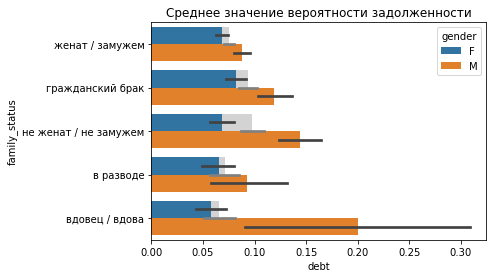

In [ ]:
# диаграмма вне зависимости от пола, цвет столбцов - серый, разброс - красный
sns.barplot(x='debt', y='family_status', data=df, color='lightgrey', errcolor='grey')
# диаграмма в зависимости от пола клиентов
sns.barplot(x='debt', y='family_status', data=df, hue='gender')
plt.title('Среднее значение вероятности задолженности');

**Вывод**

Таким образом в среднем:
- чаще остальных в срок возвращают кредит клиенты со статусом `в разводе`, `вдовец / вдова` и `женат / замужем`
- доля невернувшив кредит вовремя для групп `гражданский брак` и `не женат / не замужем` на 2-3% больше, чем для обозначенных выше

При этом мужчины показывают себя как менее надёжные клиенты в группах `вдовец` и `не женат` 
- доля вдовцев почти в 4 раза выше, чем вдов, однако разброс значений для этой категории самый высокий
- доля не женатых мужчин примерно в 2 раза выше, чем  женщин не замужем

<a id='income_analisys'></a>
#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Посмотрим на диаграмму рассеяния по доходам, выберем целевой показатель возраст, просто чтобы "размазать" точки по плоскости.
Размером и цветом выделим вероятность возврата кредита в срок

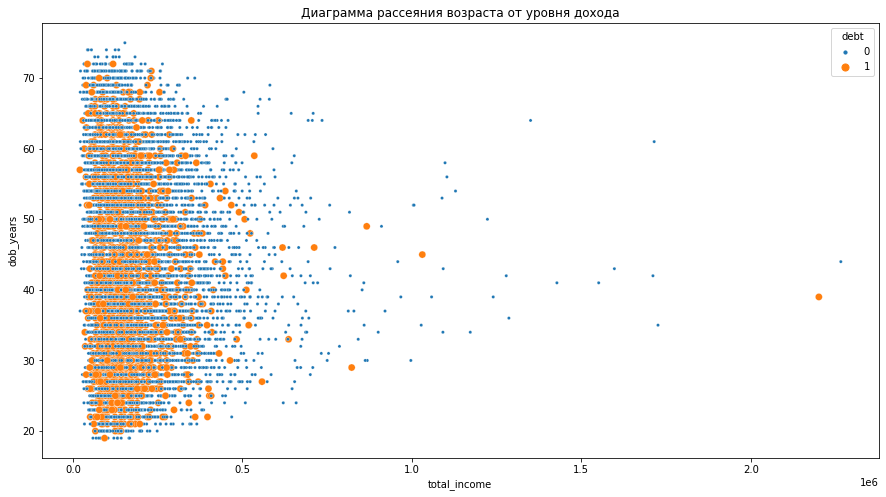

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="total_income", y="dob_years", hue="debt", 
                size="debt", sizes = (50,10))
plt.title('Диаграмма рассеяния возраста от уровня дохода');

Так закономерности видны плохо, ясно лишь, что клиенты с большимы доходами, свыше 500k - редкость, мы это уже видели 

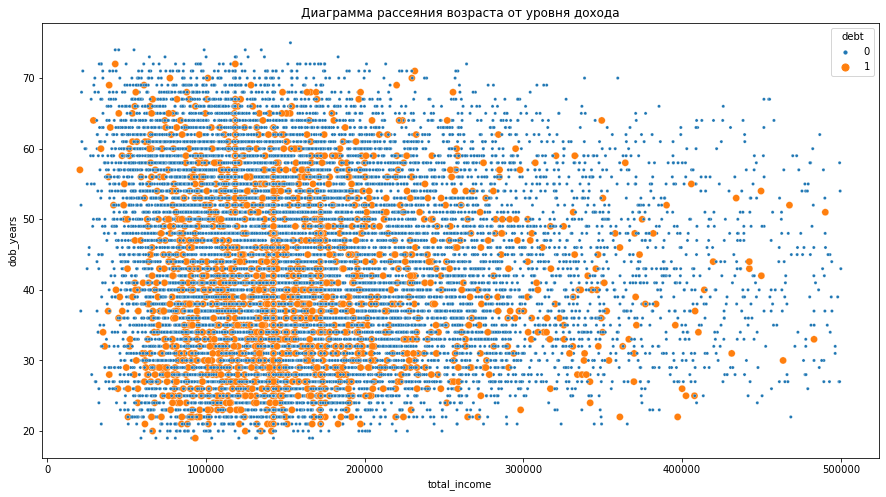

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df[df['total_income']<5e5], x="total_income", y="dob_years", 
                hue="debt", size="debt", sizes = (50,10));
plt.title('Диаграмма рассеяния возраста от уровня дохода');

Немного уточним категории, заданные изначально:

К низким доходам отнесём значения до 100k, к средним - от 100k до 150k, выше среднего - от 150k до 200k, высоким - от 200k до 350k, к очень высоким - значения свыше 350k

,mean,count
income_level,,
высокий,0.069471,2591
низкий,0.082082,6859
очень высокий,0.063063,222
очень низкий,0.061828,372
средний,0.084224,11410


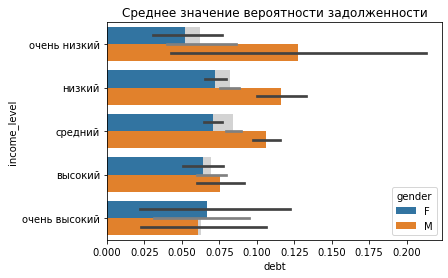

In [ ]:
# отсортируем сначала данные в таблице по уровню дохода, чтобы в диаграмме столбики шли по порядку
df = df.sort_values(['total_income'])
# присваиваем категории
df['income_level'] = df.apply(set_income_level, axis=1,
                              split_values=[50000, 120000, 250000, 500000], 
                              categories=['очень низкий','низкий','средний','высокий','очень высокий'])
# отображаем
display(df.groupby('income_level')['debt'].agg(['mean','count']))
sns.barplot(x='debt', y='income_level', data=df, color='lightgrey', errcolor='grey');
sns.barplot(x='debt', y='income_level', data=df, hue='gender')
plt.title('Среднее значение вероятности задолженности');

В целом заметно, что для высокого и очень высокого уровней доходов (свыше 250k) вероятность возврта кредита в срок выше и меньше зависимость от пола клиента.

Ниже этой отметки доля ненадёжных клиентов на 2-3 процента выше, ну и как обычно мужчины чаще имеют задолженности.

В среднем самая ненадёжная категория - клиенты с уровнем дохода от 100k до 250k, примечательно, что клиенты с уровнем дохода ниже 50k также редко имеют задолженности, как и клиенты с доходами выше 500k. Однако это самые непостоянные категории - у них большой разброс средних значений. Кроме того мужчины с очень низким доходом самые ненадежные плательщики


**Вывод**
- Для уровня доходов выше 250k вероятность возврата кредита в срок почти не зависит от пола клиента.
- Для уровня доходов ниже 250k вероятность возврата кредита в срок для женщин выше, чем для мужчин примерно в полтора раза.
- Наиболее надёжные клиенты - с женщины с очень низким заработком или клиенты с заработком выше 250k
- Наиболее ненадёжные - можчины с очень низким доходами и клиенты со средним заработком, примерно от 100k до 250k 

#### Как разные цели кредита влияют на его возврат в срок?

Сразу отобразим диаграмму, средние значения и количество значений `debt` для каждой категории

,mean,count
purpose_category,,
автомобиль,0.093590,4306
недвижимость,0.072334,10811
образование,0.092200,4013
свадьба,0.080034,2324


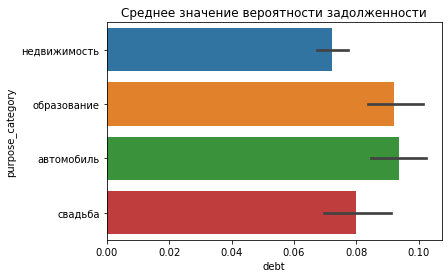

In [ ]:
display(df.groupby('purpose_category')['debt'].agg(['mean','count']))
sns.barplot(x='debt', y='purpose_category', data=df)
plt.title('Среднее значение вероятности задолженности');

**Вывод**

- По кредитам, связанным со сделками с `недвижимостью` меньше всего задолжностей, немного больше по кредитам на `свадьбы`
- Самые невозвращаемые кредиты - в категориях `автомобиль` и `образование`

## Общий вывод

**Зависимость между наличием детей и возвратом кредита**
- Доля задолжников у клиентов с детьми в среднем почти на 2% выше, чем у клиентов без детей. При этом ключевую роль играет именно факт наличия детей, нежели их количество.

**Зависимость между семейным положением и возвратом кредита в срок**
- Чаще остальных в срок возвращают кредит клиенты со статусом `в разводе`, `вдовец / вдова` и `женат / замужем`
- Доля невернувшив кредит вовремя для групп `гражданский брак` и `не женат / не замужем` на 2-3% больше, чем для обозначенных выше
- Доля мужчин не вернувших в срок кредит в категории `вдовец / вдова` почти в 4 раза выше, чем женщин
- Доля не женатых мужчин не вернувших в срок кредит примерно в 2 раза выше, чем  женщин не замужем

**Зависимость между уровнем дохода и возвратом кредита в срок**
- Для уровня доходов выше 250k вероятность возврата кредита в срок почти не зависит от пола клиента.
- Для уровня доходов ниже 250k вероятность возврата кредита в срок для женщин выше, чем для мужчин примерно в полтора раза.
- Наиболее надёжные клиенты - с женщины с очень низким заработком или клиенты с заработком выше 250k
- Наиболее ненадёжные - можчины с очень низким доходами и клиенты со средним заработком, примерно от 100k до 250k 

**Влияние целей кредита на его возврат в срок**
- По кредитам, связанным со сделками с `недвижимостью` меньше всего задолжностей, немного больше по кредитам на `свадьбы`
- Самые невозвращаемые кредиты - в категориях `автомобиль` и `образование`